<a href="https://colab.research.google.com/github/taruj/LendingClub_CaseStudy/blob/main/LendingClub_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club - Case Study**
## Group Facilitator: Taruj Bhattacharya
## Group Member: Nikhil Shinde

#### **Exploratory Data Analysis of Lending Club Data to Identify drivers for approving or rejecting loans based on applicant profile.**
---
#### Problem Statement (Business Definition)
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:


*   If the applicant **is likely** to repay the loan, then not approving the loan results in a loss (Loss of Business)
*   If the applicant is **not likely** to repay the loan, approving the loan may lead to a financial loss for the company (Default)




# Intial Steps for Loading Data, Libraries, Settings

In [1]:
# Load Data from Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set pandas options to increase the Maximum Rows and Columns
# Using set options to accommodate existing columns and derived columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Set float format to 2 decimal points 
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Load raw file 
loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/loan.csv', low_memory = False)
# low_memory = False has been set to suppress the Dtypewarning for column No 47. It has no impact on the code

# Gather Basic Information about the Dataset

In [5]:
# Get Number of Rowa and Columns
loan.shape

(39717, 111)

In [6]:
# Get the 5 point summary and basic statistical information
loan.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

# Data Cleaning
### Removing data basised on the following factors
### 1. High no. of Null Values
### 2. Single Unique Values
### 3. High no of Unique Values
### 4. Non Numerical data (Member ID, Data Source etc)
### 4. Data that is only Availble after the Loan has been Given 

In [7]:
# Identify Variables with more than 40% missing data
null_percentage = round(100*(loan.isnull().sum()/loan.shape[0]), 2)
print(null_percentage[null_percentage > 40])
print("Count of columns with more than 40% missing data {}: ".format(null_percentage[null_percentage > 40].count()))

mths_since_last_delinq            64.66
mths_since_last_record            92.99
next_pymnt_d                      97.13
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00
open_rv_24m                      100.00
max_bal_bc                       100.00
all_util                         100.00
total_rev_hi_lim                 100.00
inq_fi                           100.00
total_cu_tl                      100.00
inq_last_12m                     100.00
acc_open_past_24mths             100.00


In [8]:
# Drop the Columns (variables) that have more than 40% Missing (Null) Values
loan.drop(null_percentage[null_percentage > 40].index, axis = 1, inplace = True)

In [9]:
# Updated loan shape
loan.shape

(39717, 54)

In [10]:
# Identify the Columns (variables) that have single unique value
single_unique = loan.nunique().to_frame()
columns_to_drop = list(single_unique[single_unique.values ==1].index)
print("List of Columns having Single Unique Value {}".format(columns_to_drop))
print("No. of Columns having Single Unique Value {}".format(len(columns_to_drop)))

List of Columns having Single Unique Value ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
No. of Columns having Single Unique Value 9


In [11]:
# Drop the Column that have single unique value
loan.drop(columns_to_drop, axis = 1, inplace = True)

In [12]:
# Updated Loan Shape 
loan.shape

(39717, 45)

In [13]:
# Identify Columns that have only Unique Values
only_unique = loan.nunique().to_frame()
columns_to_drop = list(only_unique[only_unique.values == loan.shape[0]].index)
print("List of Columns having only Unique Value {}: ".format(columns_to_drop))
print("No. of Columns having only Unique Value {}: ".format(len(columns_to_drop)))

List of Columns having only Unique Value ['id', 'member_id', 'url']: 
No. of Columns having only Unique Value 3: 


In [14]:
# Drop the Column that have only unique value
loan.drop(columns_to_drop, axis = 1, inplace = True)

In [15]:
# Updated Loan Shape 
loan.shape

(39717, 42)

In [16]:
# Drop Columns that are valid for Members who have Already taken the Loan since we only want data 
# loan application and also drop columns that are only vVlid for charged-off
# Total count of such columns: 9

loan.drop(['collection_recovery_fee',\
'last_credit_pull_d',\
'last_pymnt_d',\
'out_prncp_inv',\
'out_prncp',\
'recoveries',\
'total_rec_int',\
'total_rec_late_fee',\
'total_rec_prncp'], axis=1, inplace = True)

In [17]:
# Updated Loan Shape 
loan.shape

(39717, 33)

In [18]:
# Objective Evaluation of the top 15 (50% of the Remaining) Coulums and the Unique Values therein
loan.nunique().sort_values(ascending = False).head(15)
\

total_pymnt        37850
total_pymnt_inv    37518
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
annual_inc          5318
dti                 2868
revol_util          1089
funded_amnt         1041
loan_amnt            885
zip_code             823
dtype: int64

In [19]:
# Reevaluate the data 
loan.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.16,5833.84,171.62,0.00
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.71,1008.71,119.66,0.00
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.67,3005.67,649.91,0.00
3,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.89,12231.89,357.48,0.00
4,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,3513.33,3513.33,67.79,0.00
5,5000,5000,5000.00,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.21,5632.21,161.03,0.00
6,7000,7000,7000.00,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,10110.84,10110.84,1313.76,0.00
7,3000,3000,3000.00,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,3939.14,3939.14,111.34,0.00
8,5600,5600,5600.00,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,646.02,646.02,152.39,0.00
9,5375,5375,5350.00,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,1476.19,1469.34,121.45,0.00


In [20]:
# From the Output of the Previous two Cells we can see that title, emp_title and non-numeric and generic information 
# We can drop these 3 Coulumns
columns_to_drop = ['desc', 'emp_title','title']
loan.drop(columns_to_drop, axis = 1, inplace = True)

In [21]:
# Updated Loan Shape 
loan.shape

(39717, 30)

In [22]:
loan.columns.sort_values()

Index(['addr_state', 'annual_inc', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_pymnt_amnt', 'loan_amnt', 'loan_status', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'verification_status', 'zip_code'],
      dtype='object')

In [23]:
# We can also drop "zip_code", "last_credit_pull_d", "addr_state" as they do not contribute toward analysis of loan
# We can drop "funded_amt" as we need actual funded amount for which have a "funded_amt_inv"
# Some additiional post approval features can also be dropped

columns_to_drop = ['delinq_2yrs',\
                   'revol_bal',\
                   'total_pymnt',\
                   'last_pymnt_amnt',\
                   'zip_code',\
                   'addr_state',\
                   'funded_amnt',\
                   'total_pymnt_inv',\
                   'pub_rec_bankruptcies']
loan.drop(columns_to_drop, axis = 1, inplace = True)

In [24]:
# Updated Loan Shape 
loan.shape

(39717, 21)

In [25]:
loan.columns.sort_values()

Index(['annual_inc', 'dti', 'earliest_cr_line', 'emp_length',
       'funded_amnt_inv', 'grade', 'home_ownership', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status',
       'open_acc', 'pub_rec', 'purpose', 'revol_util', 'sub_grade', 'term',
       'total_acc', 'verification_status'],
      dtype='object')

# Handling Redundant and Missing Value 

In [26]:
# Remove Rows for Having loan_status as "Current"
loan = loan[loan.loan_status != "Current"]
# Validate Remianig Unique Values
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
# Identify Percentage of Missing Values in the rows
(100*(loan.isna().sum() / loan.shape[0])).sort_values(ascending=False)

emp_length            2.68
revol_util            0.13
loan_amnt             0.00
issue_d               0.00
pub_rec               0.00
open_acc              0.00
inq_last_6mths        0.00
earliest_cr_line      0.00
dti                   0.00
purpose               0.00
loan_status           0.00
verification_status   0.00
funded_amnt_inv       0.00
annual_inc            0.00
home_ownership        0.00
sub_grade             0.00
grade                 0.00
installment           0.00
int_rate              0.00
term                  0.00
total_acc             0.00
dtype: float64

In [28]:
# Get common values for emp_legth 
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [29]:
# Since the Most Common value is nearly two times of the next most common value
# we can use the Most Common value [MODE] to replace the missing values
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
# Recheck the Number of Missing values in loan.emp_length
loan.emp_length.isna().sum()

0

In [31]:
# Check Count of Rows that have NA in 'revol_until'
loan.revol_util.isna().sum()

50

In [32]:
# Drop Row where 'revol_util' is NA
loan.dropna(axis = 0, subset = ['revol_util'], inplace = True)

In [33]:
# Recheck Count of Rows that have NA in 'revol_until'
loan.revol_util.isna().sum()

0

In [34]:
# Remove % sign from the revol_util and int_rate columns
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))


In [40]:
# Replace the values with < to 0 [zero] 
# Remove + sign from the emp_length
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x:0 if '<' in x else (x.split('+')[0] if '+' in x else x.split()[0])))

# Outlier Detection and Removal

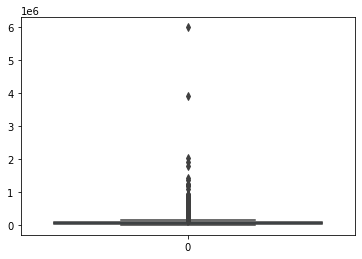

In [49]:
# Create a box plot to see if there are any outliers in the annual_inc
sns.color_palette("hls", 8)
sns.boxplot(data = loan['annual_inc'])
plt.show()